In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Weekly.csv")

In [6]:
data.dropna(inplace=True)

In [7]:
#convert the column "Direction" into binary "0" or "1"
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Direction' column
data['Direction'] = label_encoder.fit_transform(data['Direction'])

# 'Up' will be encoded as 1 and 'Down' as 0


In [11]:
#convert the year column into index
data.set_index('Year', inplace=True)

In [12]:
data.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [2]:
#a 
#Use the full dataset to fit a logistic regression of today’s stock movement (up or down) on the
#five lags of returns and the trading volume

In [13]:
#fit the logistic regression

In [15]:
X = data[['Volume'] + ['Lag5']]
y = data['Direction']

In [16]:
logreg=LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [17]:
coefficients = logreg.coef_
intercept = logreg.intercept_

(coefficients, intercept)

(array([[-0.02272886, -0.01643493]]), array([0.26137553]))

In [57]:
#b
#Calculate the confusion matrix, accuracy, precision, recall, and F1 score for the in-sample predictions.

In [22]:
from sklearn.metrics import classification_report
# Generate the classification report
y_pred = logreg.predict(X)
report = classification_report(y, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.25      0.00      0.00       484
           1       0.55      1.00      0.71       605

    accuracy                           0.55      1089
   macro avg       0.40      0.50      0.36      1089
weighted avg       0.42      0.55      0.40      1089



In [20]:
#manually calculate the confusion matrix and features
conf_matrix = confusion_matrix(y, y_pred)

conf_matrix

array([[  1, 483],
       [  3, 602]])

In [21]:
#accuracy
accuracy=(1+602)/(1+483+3+602)
accuracy

0.5537190082644629

In [23]:
#precision
precision=602/(602+483)
precision

0.5548387096774193

In [24]:
#recall
recall=602/(602+3)
recall

0.9950413223140496

In [25]:
#F1 score
F1=2*precision*recall/(precision+recall)
F1

0.7124260355029586

In [ ]:
#It is better than random guessing.Because the accuracy of random guessing is 0.5(model=0.5), so does the recall(model=0.995). 
#However, given the high recall and the moderate precision and accuracy, 
#it appears that the model does better than random guessing in terms of recall (it correctly identifies most of the positive cases),
#but not as well in terms of precision (many of the positive predictions are false). The extremely low true negative count (TN = 1)
#suggests that the model is biased towards predicting the positive class. 
#In all, the model appears to beat random guessing in terms of recall and accuracy but may not in terms of precision, depending on the class distribution. 


In [56]:
#c
#plot precision and recall against the threshold (varying over [0, 1]) used to generate predicted labels from predicted probabilities

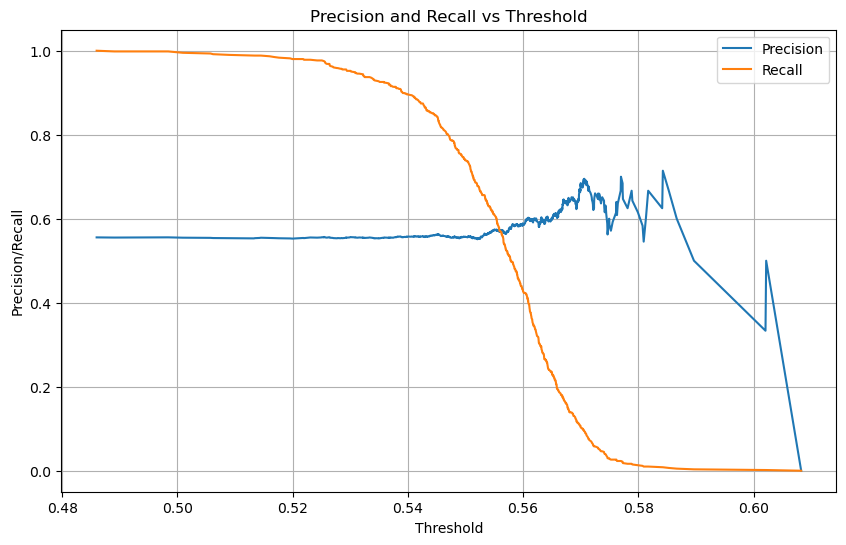

In [27]:
#method1
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming we have a logistic regression model 'logreg' and a feature set 'X'
# We need to get the predicted probabilities of the positive class (usually class 1)
y_scores = logreg.predict_proba(X)[:, 1]

# Calculate precision and recall for thresholds
precision, recall, thresholds = precision_recall_curve(y, y_scores)

# Plot precision and recall for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()


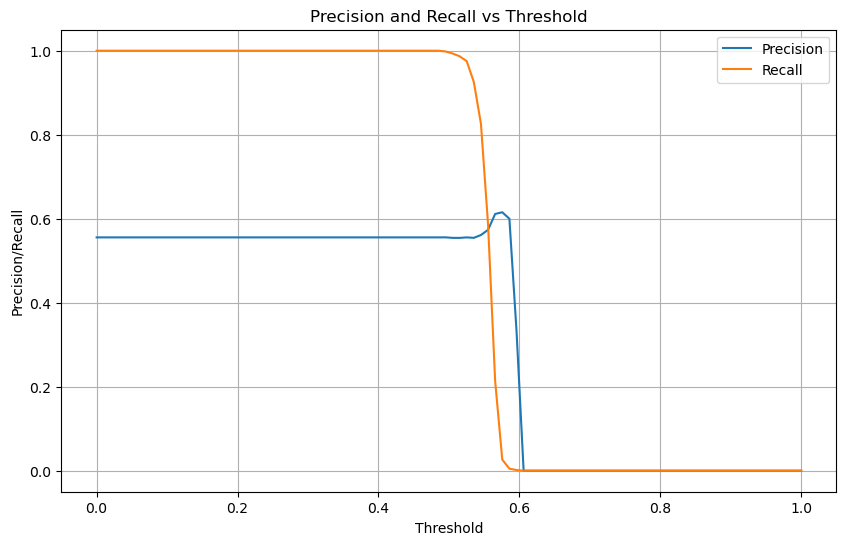

In [31]:
#method2 more manually 
from sklearn.metrics import precision_score, recall_score

# Assuming 'y_scores' are the predicted probabilities of the positive class from your model
# and 'y' are the true binary labels

# Generate a range of thresholds from 0 to 1
thresholds = np.linspace(0, 1, num=100)

# Initialize lists to store precision and recall for each threshold
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for t in thresholds:
    # Apply threshold to get the predicted binary outcome
    y_pred = (y_scores >= t).astype(int)
    
    # Calculate precision and recall
    precisions.append(precision_score(y, y_pred))
    recalls.append(recall_score(y, y_pred))

# Plot precision and recall for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [28]:
#Explanation
#As the threshold increases from 0.5, the precision and recall goes down.
#the model starts with being very precise at lower thresholds. As the threshold increases, 
#the model becomes less strict about classifying a positive, which can lead to more false positives, 
#thus reducing precision. 
#Like wise,The high initial recall indicates that the model is able to identify most of the positive cases. 
#However, as the threshold for classifying a positive increases, 
#the model starts to miss more actual positives, decreasing the recall.
#Therefore it is important to find a balance bewteen the threshold we choose in order to get optimum precision and recall.

In [30]:
#d
#Now fit the logistic regression using only data up to (and including) the year 2008, with Lag2 as the only predictor.

In [49]:
# Filter the dataset to include only the data up to and including the year 2008
data_filtered = data.loc[data.index <= 2008]

# Now select 'Lag2' from the filtered data as the predictor
X_1 = data_filtered[['Lag2']]
y_1 = data_filtered['Direction']

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model on the filtered dataset
logreg.fit(X_1, y_1)



LogisticRegression()

In [51]:
#using the remaining observations as test sample

# Filter the dataset to include only the data after the year 2008 for testing
data_test = data.loc[data.index > 2008]

# Select 'Lag2' from the test data as the predictor
X_test = data_test[['Lag2']]
y_test = data_test['Direction']

# Use the trained model to make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the confusion matrix
conf_matrix


array([[ 9, 34],
       [ 5, 56]])

In [52]:
from sklearn.metrics import classification_report
# Generate the classification report
y_pred = logreg.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)



              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



In [53]:
#the accuracy=0.62, the precision=0.62, the recall=0.92, the F1 score=0.74

In [54]:
#f
#Which of the two fitted models would you use for real-time stock return prediction?

In [55]:
#According to the classification report, the second model have better accuracy, and the precision and recall are 
#jointly better than the first model. This is because the precision increases a lot, while the recall decreases a little.
#also the F1 score is better.